In [1]:
#FACE SHAPE DETECTION

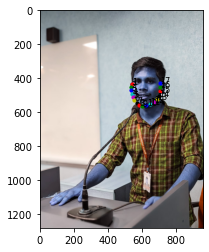

In [2]:
import cv2
import dlib
import numpy as np
import face_recognition
import math
import matplotlib.pyplot as plt

# Load the face detector and landmark predictor
detector = dlib.get_frontal_face_detector()
predictor = dlib.shape_predictor('shape_predictor_68_face_landmarks.dat')

# Load the input image
image = cv2.imread('inputimage.jpeg')

# Detect the face landmarks in the input image
face_landmarks_list = face_recognition.face_landmarks(image)

# Plot the input image
plt.imshow(image)
ax = plt.gca()

# Loop over all the faces detected in the input image
for face_landmarks in face_landmarks_list:
    # Extract the chin points for this face
    chin_points = face_landmarks['chin']
    
    # Plot the chin points in unique colors
    colors = ['r', 'g', 'b', 'c', 'm', 'y', 'k']
    for i, point in enumerate(chin_points):
        ax.scatter(point[0], point[1], c=colors[i%len(colors)], s=10)
        ax.annotate(str(i+1), xy=(point[0], point[1]), xytext=(point[0]+2, point[1]+2), color='black', fontsize=8)
    
# Show the plot
plt.show()

In [3]:
#FOREHEAD POINT

337


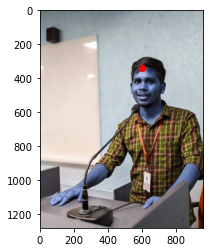

In [4]:
# Convert the image to grayscale (dlib face detector works on grayscale images)
gray = cv2.cvtColor(image, cv2.COLOR_BGR2GRAY)

# Detect faces in the grayscale image
faces = detector(gray)

# Loop over the detected faces
for face in faces:
    # Extract the coordinates of the bounding box for each face
    x, y, w, h = face.left(), face.top(), face.width(), face.height()

    # Calculate the desired top point of the bounding box (e.g., where the hairline ends)
    hairline_y = int(y - 0.2 * h)  # Adjust the multiplier (0.2) as needed

    # Adjust the bounding box to include the forehead region
    h = int(h + (y - hairline_y))
    forehead_start= hairline_y
    
print(forehead_start)

# Detect the facial landmarks for the current face
landmarks = predictor(gray, face)

# Access the glabella point from the landmarks
glabella_point = (landmarks.part(27).x, landmarks.part(27).y)

# Create a figure and axis object
fig, ax = plt.subplots()

# Load the image
img = plt.imread("input_image2.jpg")

# Display the image on the axis
ax.imshow(image)

# Plot a point with x=100 and y=200
ax.plot(glabella_point[0],forehead_start,'ro', alpha=1.0)

# Show the plot
plt.show()

In [5]:
#CHIN POINT DETECTION

(604, 562)


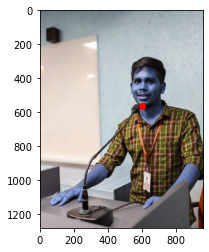

In [6]:
# Access the 9th point of the chin for the first face detected in the input image
chin_9th_point = face_landmarks_list[0]['chin'][8]

# Print the coordinates of the 9th point of the chin
print(chin_9th_point)

chin_x = chin_9th_point[0]
chin_y = chin_9th_point[1]

# Create a figure and axis object
fig, ax = plt.subplots()

# Load the image
img = plt.imread("input_image2.jpg")

# Display the image on the axis
ax.imshow(image)

# Plot a point with x=100 and y=200
ax.plot(chin_x, chin_y, 'ro', alpha=1.0)

# Show the plot
plt.show()

In [7]:
#FACE LENGTH

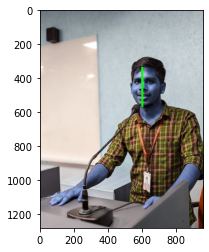

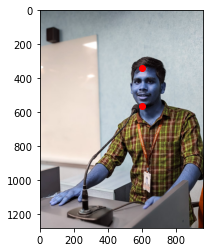

225
Distance between forehead start and chin point: 225


In [8]:
# Calculate the distance between the forehead start point and chin point
facelength = abs(chin_9th_point[1] - forehead_start)

# Draw a line between the two points in lime color
fig, ax = plt.subplots()
ax.imshow(image)
ax.plot([chin_9th_point[0],glabella_point[0] ], [chin_9th_point[1],forehead_start], color='lime', linewidth=2)

# Show the plot
plt.show()

face_x = chin_9th_point[0]
face_y = chin_9th_point[1]

face1_y = forehead_start
face1_x = glabella_point[0]

# Create a figure and axis object
fig, ax = plt.subplots()

# Display the image on the axis
ax.imshow(image)

# Plot a point with x=100 and y=200
ax.plot(face_x , face_y ,'ro', alpha=1.0)
ax.plot(face1_x , face1_y ,'ro', alpha=1.0)

# Show the plot
plt.show()
#Display the jawline distance
print(facelength)


# Print the distance
print("Distance between forehead start and chin point:", facelength)


In [9]:
#FOREHEAD DISTANCE

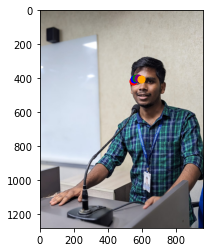

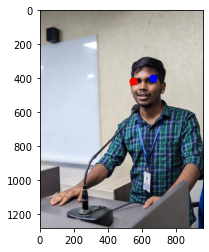

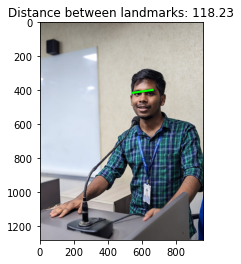

Forehead distance: 118.2285921425101


In [10]:
# Extract the facial landmarks for the first face detected
landmarks = predictor(gray, face)
# Detect the face landmarks in the input image
faces = detector(image)
landmarks = predictor(image, faces[0])

# Define the left eyebrow landmark indices
left_eyebrow_indices = [17, 18, 19, 20, 21]

# Define a color map for each landmark
colors = ['red', 'blue', 'green', 'purple', 'orange']

# Plot the landmarks on the image
for i, idx in enumerate(left_eyebrow_indices):
    x = landmarks.part(idx).x
    y = landmarks.part(idx).y
    plt.scatter(x, y, color=colors[i], s=50)

# Display the image with landmarks
plt.imshow(image[:, :, ::-1])
plt.show()

# Define the eyebrow landmark indices
left_eyebrow_indices = [17]
right_eyebrow_indices = [25]

# Define a color map for each landmark
colors = ['red', 'blue']

# Plot the landmarks on the image
for i, idx in enumerate(left_eyebrow_indices + right_eyebrow_indices):
    x = landmarks.part(idx).x
    y = landmarks.part(idx).y
    plt.scatter(x, y, color=colors[i], s=50)

# Display the image with landmarks
plt.imshow(image[:, :, ::-1])
plt.show()

# Calculate the distance between the left and right eyebrow landmarks
left_x, left_y = landmarks.part(17).x, landmarks.part(17).y
right_x, right_y = landmarks.part(25).x, landmarks.part(25).y
forehead = np.sqrt((right_x - left_x) ** 2 + (right_y - left_y) ** 2)


# Calculate the distance between the left and right eyebrow landmarks
left_x, left_y = landmarks.part(17).x, landmarks.part(17).y
right_x, right_y = landmarks.part(25).x, landmarks.part(25).y
distance = np.sqrt((right_x - left_x) ** 2 + (right_y - left_y) ** 2)

# Draw a lime line between the left and right eyebrow landmarks
plt.plot([left_x, right_x], [left_y, right_y], color='lime', linewidth=2)

# Display the image with landmarks and the distance between the eyebrow landmarks
plt.title(f'Distance between landmarks: {distance:.2f}')
plt.imshow(image[:, :, ::-1])
plt.show()


# Display the forehead distance
print("Forehead distance:", forehead)

In [11]:
#JAWLINE DISTANCE

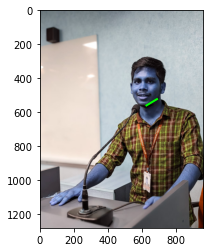

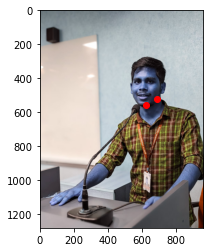

72.20110802473879


In [12]:
# Get the coordinates of the 10th and 14th chin points
point_10 = face_landmarks_list[0]['chin'][9]
point_14 = face_landmarks_list[0]['chin'][12]

# Compute the Euclidean distance between the two points
jawlength = ((point_10[0]-point_14[0])**2 + (point_10[1]-point_14[1])**2)**0.5

# Draw a line between the two points in lime color
fig, ax = plt.subplots()
ax.imshow(image)
ax.plot([point_10[0], point_14[0]], [point_10[1], point_14[1]], color='lime', linewidth=2)

# Show the plot
plt.show()

jaw_x = point_10[0]
jaw_y = point_10[1]

jaw1_x = point_14[0]
jaw1_y = point_14[1]

# Create a figure and axis object
fig, ax = plt.subplots()

# Display the image on the axis
ax.imshow(image)

# Plot a point with x=100 and y=200
ax.plot(jaw_x , jaw_y ,'ro', alpha=1.0)
ax.plot(jaw1_x , jaw1_y ,'ro', alpha=1.0)

# Show the plot
plt.show()
#Display the jawline distance
print(jawlength)


In [13]:
#CHIN DISTANCE

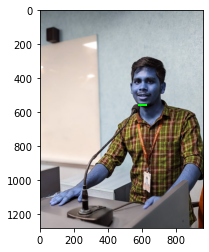

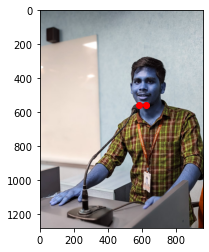

44.0
Distance between 8th and 10th points of the chin: 44.0


In [14]:
# Extract the facial landmarks for the first face in the input image
chin_points = face_landmarks_list[0]['chin']

# Get the 8th and 10th points of the chin
point_8 = chin_points[7]
point_10 = chin_points[9]

# Compute the Euclidean distance between the 4th and 8th points of the chin
chinlength = math.sqrt((point_8[0]-point_10[0])**2 + (point_8[1]-point_10[1])**2)

# Draw a line between the two points in lime color
fig, ax = plt.subplots()
ax.imshow(image)
ax.plot([point_8[0], point_10[0]], [point_8[1], point_10[1]], color='lime', linewidth=2)

# Show the plot
plt.show()

chinln_x = point_8[0]
chinln_y = point_8[1]

chinln1_x = point_10[0]
chinln1_y = point_10[1]

# Create a figure and axis object
fig, ax = plt.subplots()

# Display the image on the axis
ax.imshow(image)

# Plot a point with x=100 and y=200
ax.plot(chinln_x , chinln_y ,'ro', alpha=1.0)
ax.plot(chinln1_x , chinln1_y ,'ro', alpha=1.0)

# Show the plot
plt.show()
#Display the jawline distance
print(chinlength)


# Print the distance between the 4th and 8th points of the chin
print("Distance between 8th and 10th points of the chin:", chinlength)

In [15]:
#CHEEK BONE DISTANCE

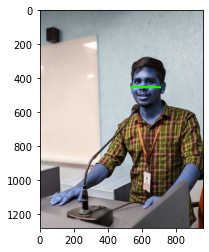

Distance between 2th and 16th points of the chin: 169.0266251216062


In [16]:
#Extract the facial landmarks for the first face in the input image
chin_points = face_landmarks_list[0]['chin']

# Get the 4th and 8th points of the chin
point_2 = chin_points[1]
point_16 = chin_points[15]

# Compute the Euclidean distance between the 4th and 8th points of the chin
cheekbone = math.sqrt((point_2[0]-point_16[0])**2 + (point_2[1]-point_16[1])**2)

# Draw a line between the two points in lime color
fig, ax = plt.subplots()
ax.imshow(image)
ax.plot([point_2[0], point_16[0]], [point_2[1], point_16[1]], color='lime', linewidth=2)

# Show the plot
plt.show()

# Print the distance between the 4th and 8th points of the chin
print("Distance between 2th and 16th points of the chin:", cheekbone)

In [17]:
#FACE SHAPE DETECTING FUNCTION

In [18]:
def calculate_ratios(facelength, cheekbone, forehead, jawlength, chinlength):
    cheekbone_ratio = cheekbone / facelength
    jawline_ratio = jawlength / facelength
    forehead_ratio = forehead / facelength
    chin_ratio = chinlength / facelength

    return cheekbone_ratio, jawline_ratio, forehead_ratio, chin_ratio


def determine_face_shape(cheekbone_ratio, jawline_ratio, forehead_ratio, chin_ratio):
    if forehead_ratio > 0.27:
        if chin_ratio < 0.18:
            if cheekbone_ratio > 0.51:
                return "Heart-shaped"
            else:
                return "Oval"
        else:
            if cheekbone_ratio > 0.47 and jawline_ratio > 0.37:
                return "Square"
            elif cheekbone_ratio > 0.47 and jawline_ratio < 0.36:
                return "Diamond"
            else:
                return "Triangle"
    else:
        if cheekbone_ratio < 0.48:
            if jawline_ratio < 0.36:
                if chin_ratio < 0.20:
                    return "Round"
                else:
                    return "Soft"
            else:
                if chin_ratio < 0.20:
                    return "Round"
                else:
                    return "Square"
        else:
            if jawline_ratio < 0.36:
                if chin_ratio < 0.20:
                    return "Round"
                else:
                    return "Soft"
            else:
                if chin_ratio < 0.20:
                    return "Round"
                else:
                    if forehead_ratio > 0.50:
                        return "Oblong"
                    else:
                        return "Square"

cheekbone_ratio, jawline_ratio, forehead_ratio, chin_ratio = calculate_ratios(facelength, cheekbone, forehead, jawlength, chinlength)


face_shape = determine_face_shape(cheekbone_ratio, jawline_ratio, forehead_ratio, chin_ratio)
print("Face shape:", face_shape)


Face shape: Diamond


In [19]:
def suggest_hairstyle(face_shape):
    # Define hairstyle suggestions and things to avoid based on face shape
    hairstyles = {
        "Oval": {
            "suggestions": ["Layered cuts", "Bob hairstyles", "Side-swept bangs"],
            "avoid": ["Heavy bangs", "Excessive volume on top"]
        },
        "Round": {
            "suggestions": ["Longer hairstyles", "Angled bobs", "Textured layers"],
            "avoid": ["Full, straight bangs", "Chin-length cuts"]
        },
        "Square": {
            "suggestions": ["Soft, layered cuts", "Side-parted styles", "Curly or wavy hair"],
            "avoid": ["Straight, blunt cuts", "Center parts"]
        },
        "Heart-shaped": {
            "suggestions": ["Pixie cuts", "Long, wavy styles", "Side-swept bangs"],
            "avoid": ["Short, tight curls", "Heavy, straight bangs"]
        },
        "Diamond": {
            "suggestions": ["Chin-length bobs", "Shoulder-length styles", "Side-swept bangs"],
            "avoid": ["Excessive volume on sides", "Short, cropped styles"]
        },
        "Triangle": {
            "suggestions": ["Layered cuts with volume on top", "Textured pixie cuts"],
            "avoid": ["Excessive volume on the sides", "Very short hairstyles"]
        },
        "Oblong": {
            "suggestions": ["Medium-length layered cuts", "Fringes or bangs", "Soft waves"],
            "avoid": ["Very long, straight hair", "High ponytails"]
        }
    }

    # Check if the given face shape is in the dictionary
    if face_shape in hairstyles:
        suggestion = hairstyles[face_shape]["suggestions"]
        avoid = hairstyles[face_shape]["avoid"]
        return f"For your {face_shape} face shape, you can try hairstyles like {', '.join(suggestion)}. Avoid {', '.join(avoid)}."

    # If the face shape is not recognized
    return "Sorry, we don't have specific hairstyle recommendations for that face shape."


hairstyle_suggestion = suggest_hairstyle(face_shape)
print(hairstyle_suggestion)

For your Diamond face shape, you can try hairstyles like Chin-length bobs, Shoulder-length styles, Side-swept bangs. Avoid Excessive volume on sides, Short, cropped styles.
